# Ensemble Learning - Random Forest Classifier

# 라이브러리 import

In [12]:
import warnings
# 특정 UserWarning을 무시
warnings.filterwarnings("ignore", category=UserWarning)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# 데이터셋 로드

In [13]:
df = pd.read_excel('../t.xlsx')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   elbow_angle1     82 non-null     float64
 1   shoulder_angle1  82 non-null     float64
 2   hip_angle1       82 non-null     float64
 3   knee_angle1      82 non-null     float64
 4   head_y1          82 non-null     float64
 5   hip_y1           82 non-null     float64
 6   ankle_y1         82 non-null     float64
 7   elbow_angle2     82 non-null     float64
 8   shoulder_angle2  82 non-null     float64
 9   hip_angle2       82 non-null     float64
 10  knee_angle2      82 non-null     float64
 11  head_y2          82 non-null     float64
 12  hip_y2           82 non-null     float64
 13  ankle_y2         82 non-null     float64
 14  elbow_angle3     82 non-null     float64
 15  shoulder_angle3  82 non-null     float64
 16  hip_angle3       82 non-null     float64
 17  knee_angle3      8

In [15]:
df.head()

,elbow_angle1,shoulder_angle1,hip_angle1,knee_angle1,head_y1,hip_y1,ankle_y1,elbow_angle2,shoulder_angle2,hip_angle2,...,hip_y4,ankle_y4,elbow_angle5,shoulder_angle5,hip_angle5,knee_angle5,head_y5,hip_y5,ankle_y5,label
0,10.400263,17.673764,26.184921,0.284768,0.344444,0.687963,0.944444,24.534306,6.310853,55.628690,...,0.725926,0.949074,34.594161,109.256079,144.512760,143.365886,0.712963,0.784259,0.891667,0
1,24.534306,6.310853,55.628690,32.406365,0.407407,0.673148,0.948148,35.324666,28.136362,112.975054,...,0.784259,0.891667,21.865864,113.367315,124.162765,158.982499,0.762963,0.817593,0.919444,0
2,35.324666,28.136362,112.975054,45.041201,0.535185,0.687037,0.960185,43.560261,63.863299,119.696210,...,0.817593,0.919444,16.184766,132.641296,85.622237,159.643424,0.804630,0.801852,0.879630,0
3,43.560261,63.863299,119.696210,80.471795,0.637963,0.725926,0.949074,34.594161,109.256079,144.512760,...,0.801852,0.879630,23.033387,27.547829,69.671876,119.997724,0.783333,0.841667,0.962037,0
4,34.594161,109.256079,144.512760,143.365886,0.712963,0.784259,0.891667,21.865864,113.367315,124.162765,...,0.841667,0.962037,16.268457,1.251526,16.758958,15.855507,0.699074,0.835185,0.920370,0


In [16]:
X = df.drop(columns=['label'])  # 특징 (feature)
y = df['label']   

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print('분류 모델 로드 성공')


분류 모델 로드 성공


In [17]:
test_pred = model.predict(X_test)

# 모델 평가
print("검증 세트 정확도:", accuracy_score(y_test, test_pred))
# print("검증 세트 ROC AUC 점수:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("검증 세트 보고서:\n", classification_report(y_test, test_pred))

검증 세트 정확도: 0.8888888888888888
검증 세트 보고서:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.67      0.80         3
           2       0.67      1.00      0.80         2

    accuracy                           0.89         9
   macro avg       0.89      0.89      0.87         9
weighted avg       0.93      0.89      0.89         9



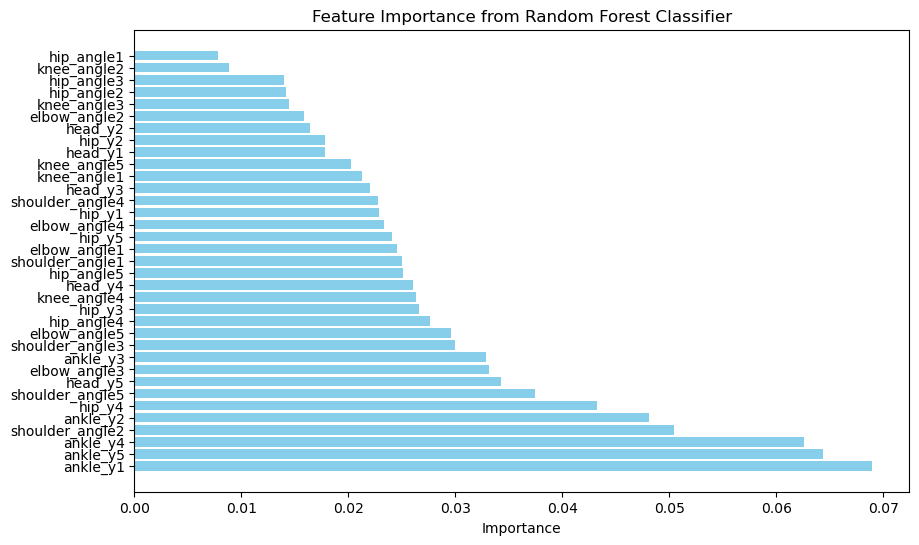

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특성 중요도 가져오기
importances = model.feature_importances_

# 피처 이름과 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# 중요도 기준으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Classifier')
plt.show()